In [2]:
import numpy as np
import pickle

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [38]:
with open("data/images_l.pkl", 'rb') as f:
    labeled_images = pickle.load(f)
with open("data/labels_l.pkl", 'rb') as f:
    labels = pickle.load(f)
with open("data/images_ul.pkl", 'rb') as f:
    unlabeled_images = pickle.load(f)
with open("data/images_test.pkl", 'rb') as f:
    images_test = pickle.load(f)

print(np.shape(labeled_images))

(30000, 56, 56)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
import matplotlib.pyplot as plt # Plotting utils
from mpl_toolkits.axes_grid1 import ImageGrid # More plotting...
import numpy as np; import math # Numpy and math

# Plots a single row of images
def __plot_image_row(data):
    num_plots = data.shape[0]
    fig = plt.figure(figsize=(num_plots, 10.*num_plots))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, num_plots), axes_pad=0.1)
    for i in range(num_plots):
        grid[i].imshow(data[i].reshape((56, 56)))
    plt.show()

# Plots a series of rows of images given a range
def plot_images(data, total_digit_range = None, row_size = 10):
    if (total_digit_range == None): total_digit_range = range(0, len(data))
    num_rows =  math.ceil(total_digit_range.stop / row_size)
    rows = [i * row_size for i in range(0, num_rows)]
    rows = [range(max(total_digit_range.start, start), min(start + row_size, total_digit_range.stop)) for start in rows]
    for row in rows: __plot_image_row(np.array([data[i] for i in row]))

In [71]:
import random

labeled_images_rot = []
labels_rot = []
count = 0
for x in labeled_images:
    labels_rot += [count]
    labels_rot += [count]
    labels_rot += [count]
    labels_rot += [count]
    labeled_images_rot += [x]
    labeled_images_rot += [np.rot90(x)]
    labeled_images_rot += [np.rot90(x, 2)]
    labeled_images_rot += [np.rot90(x, 3)]
    count += 1

randomized_images = list(zip(labeled_images_rot, labels_rot))
random.shuffle(randomized_images)
labeled_images_rot, labels_rot = zip(*randomized_images)



Matrix rotation
first is just a temporary rotation

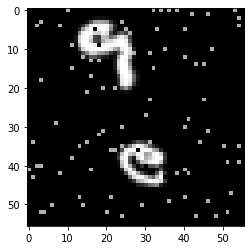

In [73]:
fig = plt.figure
plt.imshow(labeled_images_rot[0], cmap='gray')
plt.show()